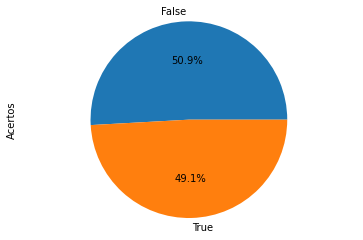

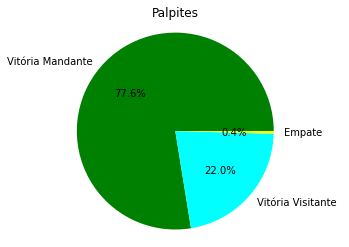

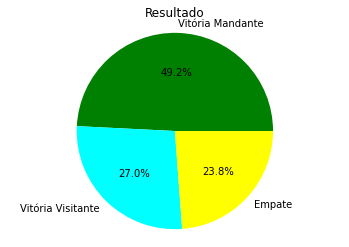

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#imports databate - importanto database
df=pd.read_excel("brasileirão.xltx")
#cleans up and organizes the data -limpando e organizando os dados - 
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("string") 
#repairs some erros in the original dataframe - reparam erros no dataframe original, no qual um jogo estava duplicado
df.drop(index=20, inplace=True)

#separete it in columns - separando colunas 
new = df["Resultado"].str.split("x", n = 1, expand = True)
df["Gol1"]= new[0] 
df["Gol2"]= new[1]
df.drop(columns =["Resultado"], inplace = True)
#makes dtype legible to the machine - Transforma os dtype em forma legível -
df = df.replace('%','', regex=True)
df["Vitória do Mandante"]=pd.to_numeric(df["Vitória do Mandante"],errors="coerce")
df["Empate"]=pd.to_numeric(df["Empate"],errors="coerce")
df["Vitória do Visitante"]=pd.to_numeric(df["Vitória do Visitante"],errors="coerce")
#compares the chances to show the guess - compara as chances para decidir o palpite
def palpite(df):
    
    if (df['Vitória do Mandante'] > df['Vitória do Visitante'] and df['Vitória do Mandante'] > df['Empate']):
        return "Vitória Mandante"
    elif (df['Vitória do Visitante'] > df['Vitória do Mandante'] and df['Vitória do Visitante'] > df['Empate']):
        return "Vitória Visitante"
    elif (df['Empate'] > df['Vitória do Visitante'] and df['Empate'] > df['Vitória do Mandante']):
        return "Empate"
   
df['Palpite'] = df.apply(palpite, axis = 1)
#compares the scores to show the results - compara os placares para decidir o resultado
df.loc[df['Gol1'] == df['Gol2'], 'Resultado'] = 'Empate' 
df.loc[df['Gol1'] > df['Gol2'], 'Resultado'] = 'Vitória Mandante' 
df.loc[df['Gol1'] < df['Gol2'], 'Resultado'] = 'Vitória Visitante'
#compares the actual result with the guess to find the accuracy - Compara resultado e palpites para decidir acertos 
def acertos(df):
    if (df['Palpite'] == df['Resultado']):
        return True 
    else:
        return False
 
df['Acertos'] = df.apply(acertos, axis = 1)
#mostra a prevalência de cada valor na coluna 'resultado' para calcular as porcentagens
#count the occurrences of each value in the 'result' column and calculate the percentages
counts = df['Acertos'].value_counts()
percentagesAcertos = counts * 100 / counts.sum()
counts = df['Palpite'].value_counts()
percentagesPalpites = counts * 100 / counts.sum()
counts = df['Resultado'].value_counts()
percentagesResultado = counts * 100 / counts.sum()


#Define um dicionário de cores - Define the colors dictionary
colors_dict = {'Vitória Mandante': 'green', 'Empate': 'yellow', 'Vitória Visitante': 'cyan'}  # Example colors for Palpite

#Cria um grafico circular com as cores definidas - Create the pie charts with the custom colors

percentagesAcertos.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()
plt.pie(percentagesPalpites, labels=percentagesPalpites.index, colors=[colors_dict[label] for label in percentagesPalpites.index], autopct='%1.1f%%')
plt.title('Palpites')
plt.axis('equal')
plt.show()
plt.pie(percentagesResultado, labels=percentagesPalpites.index, colors=[colors_dict[label] for label in percentagesPalpites.index], autopct='%1.1f%%')
plt.title('Resultado')
plt.axis('equal')
plt.show()


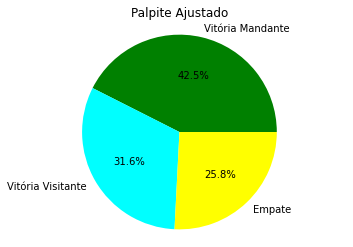

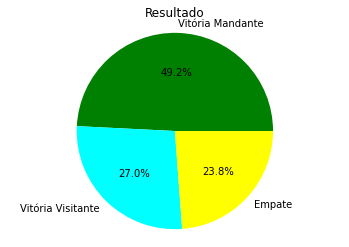

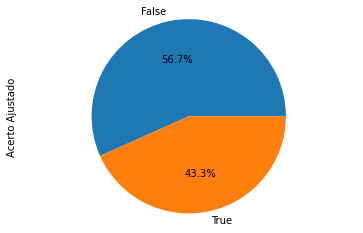

In [6]:
#the results show a great inconsistency between guess and results
#o resultado mostra que há uma grave incorreção entre os resultados e os palpites

#One of the problems is that the guesses overestimate the number of victories by a third, grossly
#underestimating the possibility of a draw. Below I'll try to solve that
#Um dos problemas é que há um claro exagero nos palpites "vitória". Abaixo, há uma tentativa de resolver essa questão

#compares the chances to show a new, more "acurate guess" - compara as porcentagens para mostrar um " palpite ajustado" - 
def palpite_ajustado(df):
    
    if (df['Vitória do Mandante'] >= 50):  
        return "Vitória Mandante"
    elif (df['Vitória do Visitante'] >= 35):
        return "Vitória Visitante"  
    elif (df['Vitória do Mandante'] < 50):
        return "Empate"    
    elif (df['Vitória do Visitante'] < 35):
        return "Empate"
    elif (df['Empate'] > 1):
        return "Empate"
df['Palpite Ajustado'] = df.apply(palpite_ajustado, axis = 1)

#Compara resultado e "palpites ajustados" para decidir " acertos ajustados" 
#compares the actual result with the new guess to get a "new accuracy"
def acertos(df):
    
    if (df['Palpite Ajustado'] == df['Resultado']):
        return True 
    else:
        return False
 
df['Acerto Ajustado'] = df.apply(acertos, axis = 1)

counts = df['Palpite Ajustado'].value_counts()
percentagesPA = counts * 100 / counts.sum()

counts = df['Acerto Ajustado'].value_counts()
percentagesAA = counts * 100 / counts.sum()


# plot the results as a pie chart - configura os resultados num gráfico redondo
plt.pie(percentagesPA, labels=percentagesPalpites.index, colors=[colors_dict[label] for label in percentagesPalpites.index], autopct='%1.1f%%')
plt.title('Palpite Ajustado')
plt.axis('equal')
plt.show()
plt.pie(percentagesResultado, labels=percentagesPalpites.index, colors=[colors_dict[label] for label in percentagesPalpites.index], autopct='%1.1f%%')
plt.title('Resultado')
plt.axis('equal')
plt.show()
percentagesAA.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()


(-1.103778305598785,
 1.1001799193142279,
 -1.103957799392148,
 1.1021370829390864)

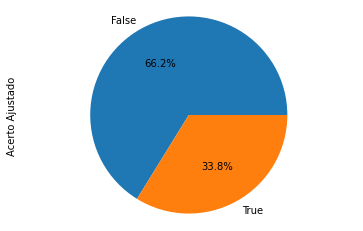

In [8]:
#we can see thath, altough the guesses are more in line with reality, there now an even greater gap. 
#The problem still seams to be the "empate" (draw) data
#É possível ver que, embora os palpites estejam mais alinhados com a realidade, isso por si não resolveu o problema
#O problema ainda parece ser os dados do empate.


#Filter the results - filta os resultados
filtroempate =(df['Resultado'] == 'Empate')

#Uses the filter to show de accuracy of the guesses in a pie chart - Usa o filtro par amostar a precisão dos palpites 
counts = df.loc[filtroempate, 'Acerto Ajustado'].value_counts()
percentagesEmpate = counts * 100 / counts.sum()
percentagesEmpate.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
